In [0]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
linken = "gdirve/My Drive/TTH_Digital_Image_Processing/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import os
linken = "gdrive/My Drive/TTH_Digital_Image_Processing/"
print(os.path.isdir(linken))
print(os.path.isfile(linken + "Lab05Data/cubic_indoor.jpg"))
print(os.path.isfile(linken + "Lab05Data/nemo1.jpg"))



True
True
True


In [0]:
import cv2
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
from pylab import imread

In [0]:
def imshows(ImageData, LableData, rows, columns, gridType = True):
  ImageArray = list(ImageData)
  LableArray = list(LableData)

  from matplotlib import pyplot as plt
  fig = plt.figure()
  for i in range (1,rows*columns +1):
    fig.add_subplot(rows, columns, i)
    image = ImageArray[i -1]
    if(len(image.shape)<3):
      plt.imshow(image,plt.cm.gray)
      plt.grid(gridType)
    else:
      plt.imshow(image)
      plt.grid(gridType)
    plt.title(LableArray[i - 1])
  plt.show()

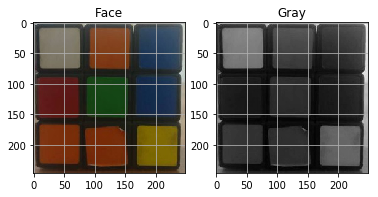

Intensity Min: 0.06720313725490196
Intensity Max: 0.9059129411764706


In [0]:
image = imread(linken + "Lab05Data/cubic_indoor.jpg")
image_gray = rgb2gray(image)

imshows([image, image_gray],["Face","Gray"],1,2,gridType = True)

print("Intensity Min: " + str(image_gray.min()))
print("Intensity Max: " + str(image_gray.max()))


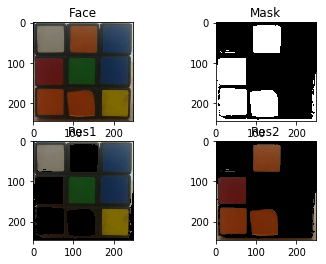

In [0]:
import cv2
import numpy as np

image = imread(linken + "Lab05Data/cubic_indoor.jpg")

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_blue = np.array([100,50,50])
upper_blue = np.array([130,255,255])

mask = cv2.inRange(hsv, lower_blue, upper_blue)

res1 = cv2.bitwise_and(image, image, mask = 255 - mask)
res2 = cv2.bitwise_and(image, image, mask = mask)

imshows([image,mask, res1, res2],["Face","Mask","Res1","Res2"],2,2,gridType = False)

In [0]:
green = np.uint8([[[255,255,0]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
print(hsv_green)


[[[ 90 255 255]]]


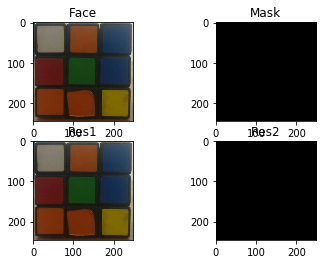

In [0]:
import cv2
import numpy as np

image = imread(linken + "Lab05Data/cubic_indoor.jpg")

hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

lower_blue = np.array([80,150,150])
upper_blue = np.array([100,255,255])

mask = cv2.inRange(hsv, lower_blue, upper_blue)

res1 = cv2.bitwise_and(image,image, mask = 255 - mask)
res2 = cv2.bitwise_and(image,image, mask = mask)
                      
imshows([image,mask,res1,res2],["Face","Mask","Res1","Res2"],2,2,gridType = False)

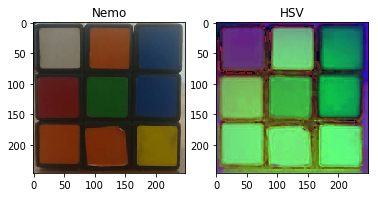

In [0]:
image = imread(linken + "Lab05Data/cubic_indoor.jpg")
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

imshows([image, hsv],["Nemo","HSV"],1,2,gridType = False)


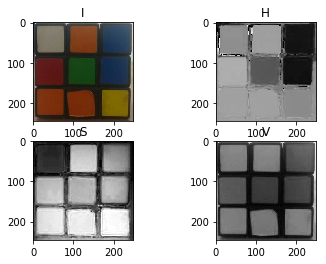

In [0]:
H, S, V = cv2.split(hsv)

imshows([image, H, S, V],["I","H","S","V"],2,2, gridType = False)

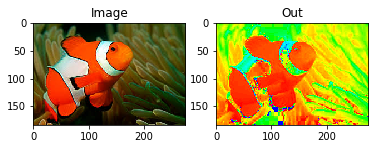

In [0]:
import cv2

image = imread(linken + "Lab05Data/nemo0.jpg")
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

h,s,v = cv2.split(hsv_image)
s.fill(255)
v.fill(255)
hsv_image = cv2.merge([h,s,v])

out = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

imshows([image, out],["Image","Out"],1,2, False)


In [0]:
def segment_fish(image):
  hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
  light_orange = (1,190,200)
  dark_orange = (18,255,255)
  mask = cv2.inRange(hsv_image, light_orange, dark_orange)
  light_white = (0, 0, 200)
  dark_white = (145,60,255)
  mask_white = cv2.inRange(hsv_image, light_white, dark_white)
  final_mask = mask + mask_white
  result = cv2.bitwise_and(image, image, mask = final_mask)
  result = cv2.GaussianBlur(result,(7,7),0)
  return result

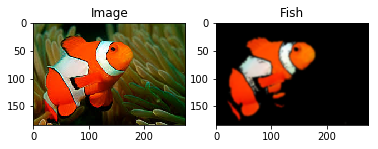

In [0]:
fish = segment_fish(image)
imshows([image, fish],["Image","Fish"],1,2,False)


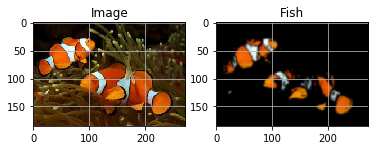

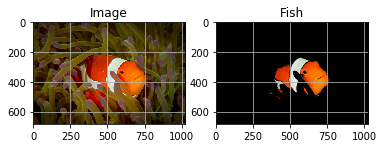

In [0]:
image = imread(linken + "Lab05Data/nemo1.jpg")
fish = segment_fish(image)
imshows([image, fish],["Image","Fish"],1,2, )

image = imread(linken + "Lab05Data/nemo4.jpg")
fish = segment_fish(image)
imshows([image, fish],["Image","Fish"],1,2, )

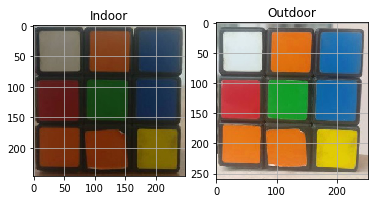

In [0]:
cube_indoor = imread(linken + "Lab05Data/cubic_indoor.jpg")
cube_outdoor = imread(linken + "Lab05Data/cubic_outdoor.jpg")

imshows([cube_indoor,cube_outdoor],["Indoor","Outdoor"],1,2,0)


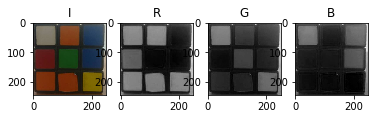

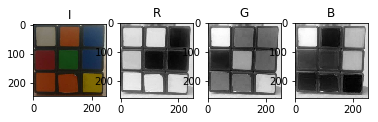

In [0]:
R,G,B = cv2.split(cube_indoor)
imshows([cube_indoor, R, G, B],["I","R","G","B"],1,4,0)
R,G,B = cv2.split(cube_outdoor)
imshows([cube_indoor, R, G, B],["I","R","G","B"],1,4,0)

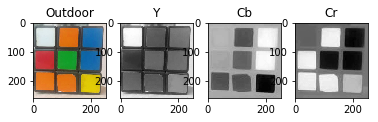

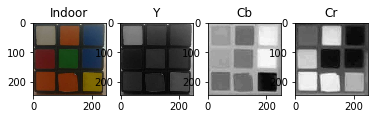

In [0]:
brightYCbCr = cv2.cvtColor(cube_outdoor, cv2.COLOR_BGR2YCrCb)
darkYCbCr = cv2.cvtColor(cube_indoor, cv2.COLOR_BGR2YCrCb)

Y, Cb, Cr = cv2.split(brightYCbCr)
imshows([cube_outdoor, Y, Cb, Cr],["Outdoor","Y","Cb","Cr"],1,4,0)

Y, Cb, Cr = cv2.split(darkYCbCr)
imshows([cube_indoor, Y, Cb, Cr],["Indoor","Y","Cb","Cr"],1,4,0)



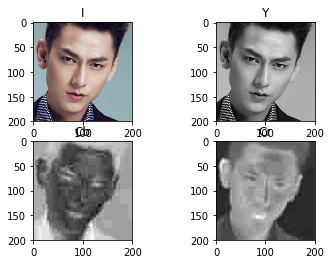

In [0]:
image = imread(linken + "Dataset_01/FaceShape 02.jpg")
faceYCbCr = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

Y, Cb, Cr = cv2.split(faceYCbCr)
imshows([image,Y, Cb,Cr],["I","Y","Cb","Cr"],2,2,0)


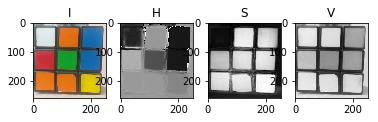

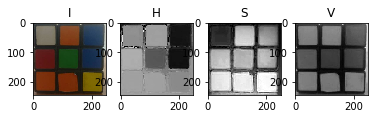

In [0]:
brightHSV = cv2.cvtColor(cube_outdoor, cv2.COLOR_BGR2HSV)
darkHSV = cv2.cvtColor(cube_indoor, cv2.COLOR_BGR2HSV)

H, S, V = cv2.split(brightHSV)
imshows([cube_outdoor, H,S,V],["I","H","S","V"],1,4,0)
H, S, V = cv2.split(darkHSV)
imshows([cube_indoor, H,S,V],["I","H","S","V"],1,4,0)